<a href="https://colab.research.google.com/github/basselkassem/easy21/blob/master/Dynamic_Programing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libs

In [3]:
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=f658a6f0e0c34ac6deb80e5c4332e81fa7ee010cd9eed58567b45903106cb0e6
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/'Colab Notebooks'/easy21

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/easy21


# Import Libs

In [0]:
import import_ipynb
import environment as env
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Information state
A state s is a Markov state if
P(s_next | s) = P(s_next | s0, s1, ..., s)

Once the current state is known, we can throw the history

## Major component of an RL Agent

*   Policy (agent behaviour)
*   Value Function (How good each state, action)
*   Model (agent representation of the environment



### Policy
* Deteminstic: action = pi(state)
* Stochastic: pi(action | state) = P(action | state)

### Value function
* It is a prediction of future rewards
* Used to evaluate goodness/badness of states
* V_pi(s) = E_pi[R_t+1 + gamma * R_t+2, gamma^2 * R_t+3, ....)

## RL Agents Categories


*   Value Based Agent
*   Policy Based Agent
*   Value-Policy Agent (Actor-Critic)
---
*   Model Free Agent (Value or Policy based agent)
*   Model Based Agent (Value or Policy based agent)





## Learning and Planning
There are two fundamental problems in Sequential Decision Making:


**Reinforcement Learning**
* The model of the environment is Unknown
* The agent learn through interacting with the environment
* The agent impoves its policy

**Planning**
* A model of the environment is Known
* The model perform computation within its model (No interaction with the environment is required)
* The agent improve its policy through Search, reasoning, introspection


## Prediction and Control
* **Prediction**: is to evaluate the future given a policy
* **Control**: is to optimize the future by finding the best policy


# Markov Decision Process
It is an environment in which each state is a Markov state.

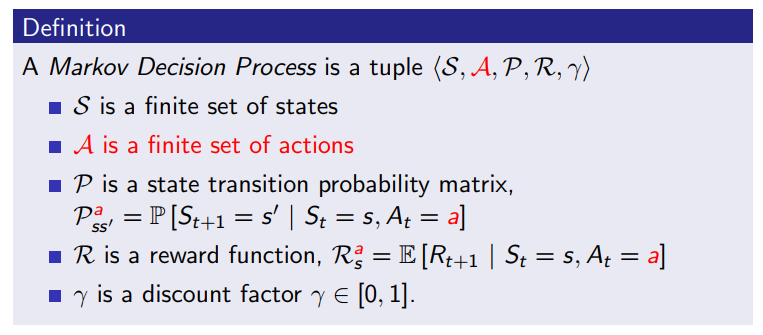

## Policies


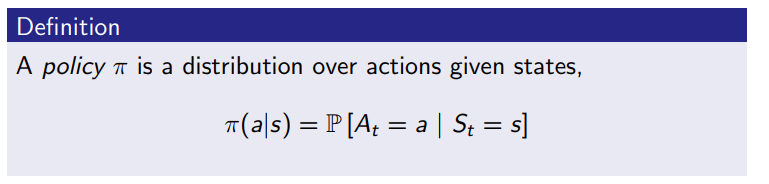

Policies are stationary (time independent)

A_t ~ pi(. | S_t) what ever t

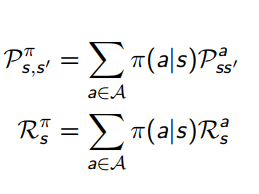

## Value function

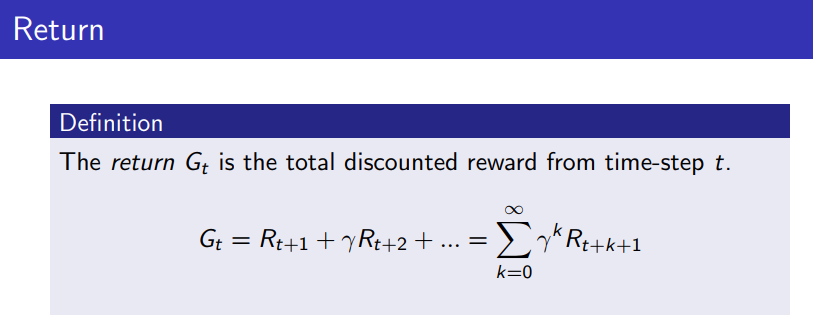

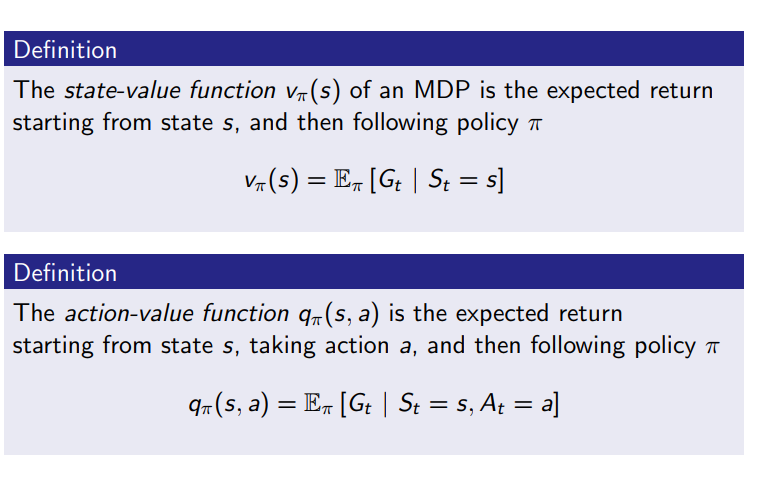

## Bellman Expectation Equation

Bellman equations tell us that the value function of the current state can be decomposed into immediate reward plus the discounted value function of the successor state

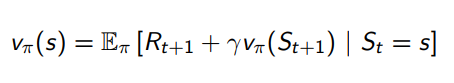

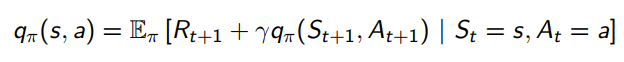

## Optimal Value function

It is the maximum of value fuction over all Polices

## Bellman Optimality Equation

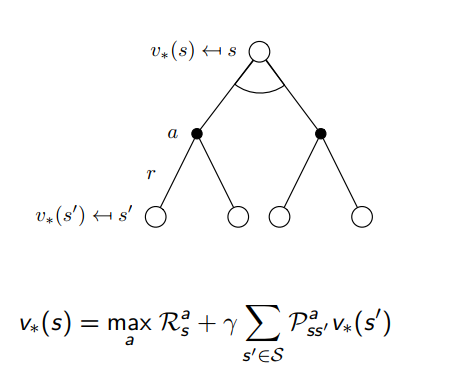

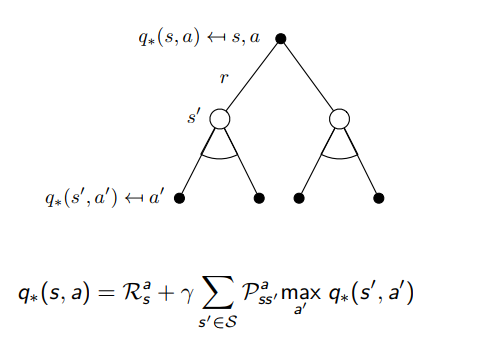

## Solving Bellman equations

* Value Iteration
* Policy Iteration
* Q-Learning
* Sarsa

# Planning by DP

Dynamic programming is assumes full knowledge of the MDP.

**Prediction**:

input: MDP <S, A, P, R, gamma> and pi

output: V_pi

**Control:**

input: MDP <S, A, P, R, gamma>

output: pi_+, V_+

# Implemnting the MDP

In [0]:
def draw2d_square_array(array, title):
    fig, ax = plt.subplots(figsize = (11, 11))
    sns.heatmap(
        array, 
        linewidths = 0.1, 
        annot = True, 
        xticklabels = 1,
        yticklabels = 1,
        cbar = False,
        fmt = "0.2f",
        square = True,
        ax = ax,
        alpha = 0.8,
    )
    ax.set_title(title)
    plt.show()

def draw2d_array(array, title):
    fig, ax = plt.subplots(figsize = (8, 8))
    sns.heatmap(
        array, 
        linewidths = 0.1, 
        annot = True, 
        xticklabels = 1,
        yticklabels = 1,
        cbar = False,
        fmt = "0.2f",
        cmap = 'coolwarm',
        ax = ax,
        alpha = 0.8,
    )
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xticklabels(range(0, env.CARD_VALUE_MAX + 1))
    ax.set_yticklabels(range(0, env.MAX_VALUE + 1))
    ax.set_xlabel("Dealer's first card")
    ax.set_ylabel("Player's score")
    ax.set_title(title)
    plt.show()

def check_sanity(proba_dist, name):
    print('Checking sanity for', name)
    assert np.all(proba_dist <= 1.0), 'Values must be less than 1'
    assert np.all(proba_dist >= 0.0), 'Values must be bigger than 0'
    assert np.allclose(np.sum(proba_dist, axis = 1), 1.0), 'Values must sum to 1'
    print('Looks good')

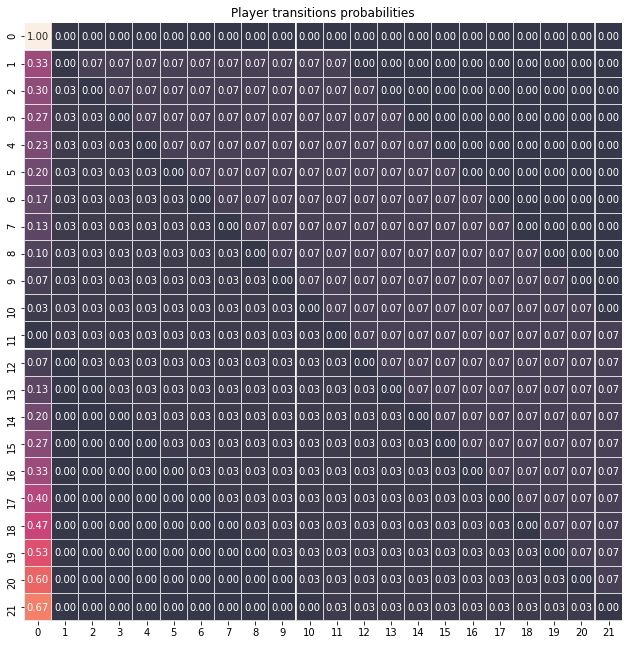

Checking sanity for player score transitions
Looks good


In [68]:
trans_proba = np.zeros((env.MAX_VALUE + 1 , env.MAX_VALUE + 1))
card_proba = 1 / 10
black_card_proba = (2 / 3 )* card_proba
red_card_proba = (1 / 3) * card_proba

trans_proba[0, 0] = 1

for i in np.arange(1, 11):
    trans_proba[i, 0] = red_card_proba * len(np.arange(i, 11))
    trans_proba[i, 1: i] = red_card_proba
    trans_proba[i, i + 1: i + 11] = black_card_proba

for i in np.arange(11, 22):
    trans_proba[i, 0] = black_card_proba * len(np.arange(22 - i, 11))
    trans_proba[i, i - 10: i] = red_card_proba
    trans_proba[i, i + 1: i + 22] = black_card_proba
    
player_trans_proba = trans_proba.copy()
draw2d_square_array(player_trans_proba, 'Player transitions probabilities')
check_sanity(player_trans_proba, 'player score transitions')

# Theorem 
Let P be the transaction matrix of a Markov chain. The ij_the element p_ij in the matrix P^n = P.P...P gives the probability that the Markov chain, starting form s_i will end in s_j after n-steps

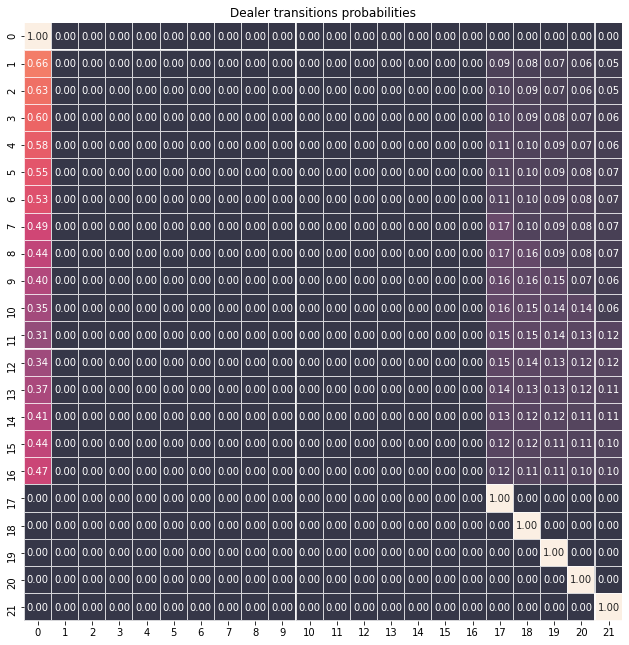

Checking sanity for Dealer score transitions
Looks good


In [69]:
dealer_trans_proba = trans_proba.copy()
dealer_trans_proba[17:] = 0
dealer_trans_proba[17:, 17:] = np.eye(5)

for itr in np.arange(50):
    temp = np.dot(dealer_trans_proba, dealer_trans_proba)
    diff = np.max(np.abs(temp - dealer_trans_proba))
    dealer_trans_proba = temp
    if diff < 1e-9:
        break
draw2d_square_array(dealer_trans_proba, 'Dealer transitions probabilities')
check_sanity(dealer_trans_proba, 'Dealer score transitions')

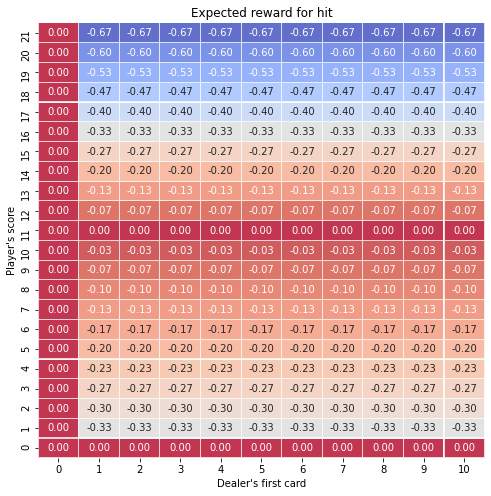

In [70]:
rewards = np.zeros((env.MAX_VALUE + 1, env.MAX_VALUE + 1))
rewards[1:, 0] = -1
rewards_hit = np.sum(player_trans_proba * rewards, axis= -1)
rewards_hit = rewards_hit.reshape(-1, 1) + np.zeros((env.MAX_VALUE + 1, env.MAX_VALUE + 1))
rewards_hit[:, 0] = 0
rewards_hit = rewards_hit[:, 0: 11]
draw2d_array(rewards_hit, 'Expected reward for hit')

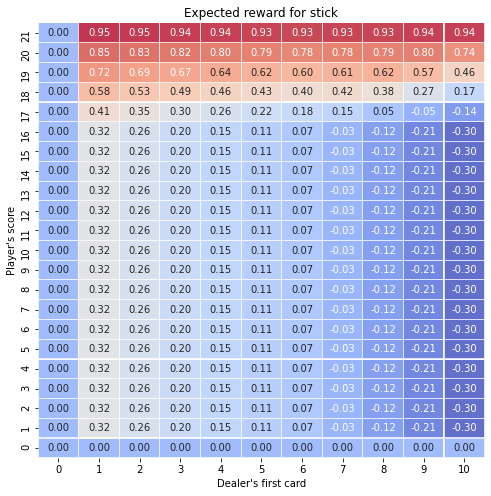

In [80]:
rewards = np.zeros((env.MAX_VALUE + 1, env.MAX_VALUE + 1, env.MAX_VALUE + 1))
rewards[1:, 1:, 0] = 1.0 # player wins (dealer is busted)
for k in range(1, env.MAX_VALUE + 1):
    rewards[1: k, 1: 17, k] = -1.0 # dealer wins (dealer score > player score)
    rewards[k + 1:, 1: 17, k] = 1.0 # player wins (player score > dealer score)
rewards_stick = np.sum(dealer_trans_proba * rewards, axis = -1)[:, 0: 11]
draw2d_array(rewards_stick, 'Expected reward for stick')